# Создание первого чатбота

Чат-бот— это программа, которая имитирует реальный разговор с пользователем. Чат-боты позволяют общаться с помощью текстовых или аудио сообщений на сайтах, в мессенджерах, мобильных приложениях 

Основные преимущества

* Обеспечивают сервисное обслуживание 24/7
* Помогают охватить больше клиентов
* Экономность
* Легкость в эксплуатации
	
Как они работают?
Большинство людей не будут создавать своих чат-ботов с нуля, так как сегодня существует достаточно большой выбор всевозможных фреймворков и сервисов, которые могут помочь в создании чат-бота. Однако чтобы понять, как они работают нужно погрузиться немного глубже.
Бэкенд: Чат-боты могут быть разработаны на любом языке программирования
Фронтенд: Это может быть любой мессенджер: от популярных вроде Facebook Messenger, Slack, Telegram до простеньких Realtime Chat With Node.js. Вы не ограничены одной платформой: один и тот же бот может работать, по сути, везде.

## Шаг 1. Создаём бота в Telegram

Открываем телеграм и ищем чат @botfather. 
Сначала пишем /newbot. Затем задаем имя, потом id.
После создания бота нам придёт API токен, он нам понадобится в дальнейшем.

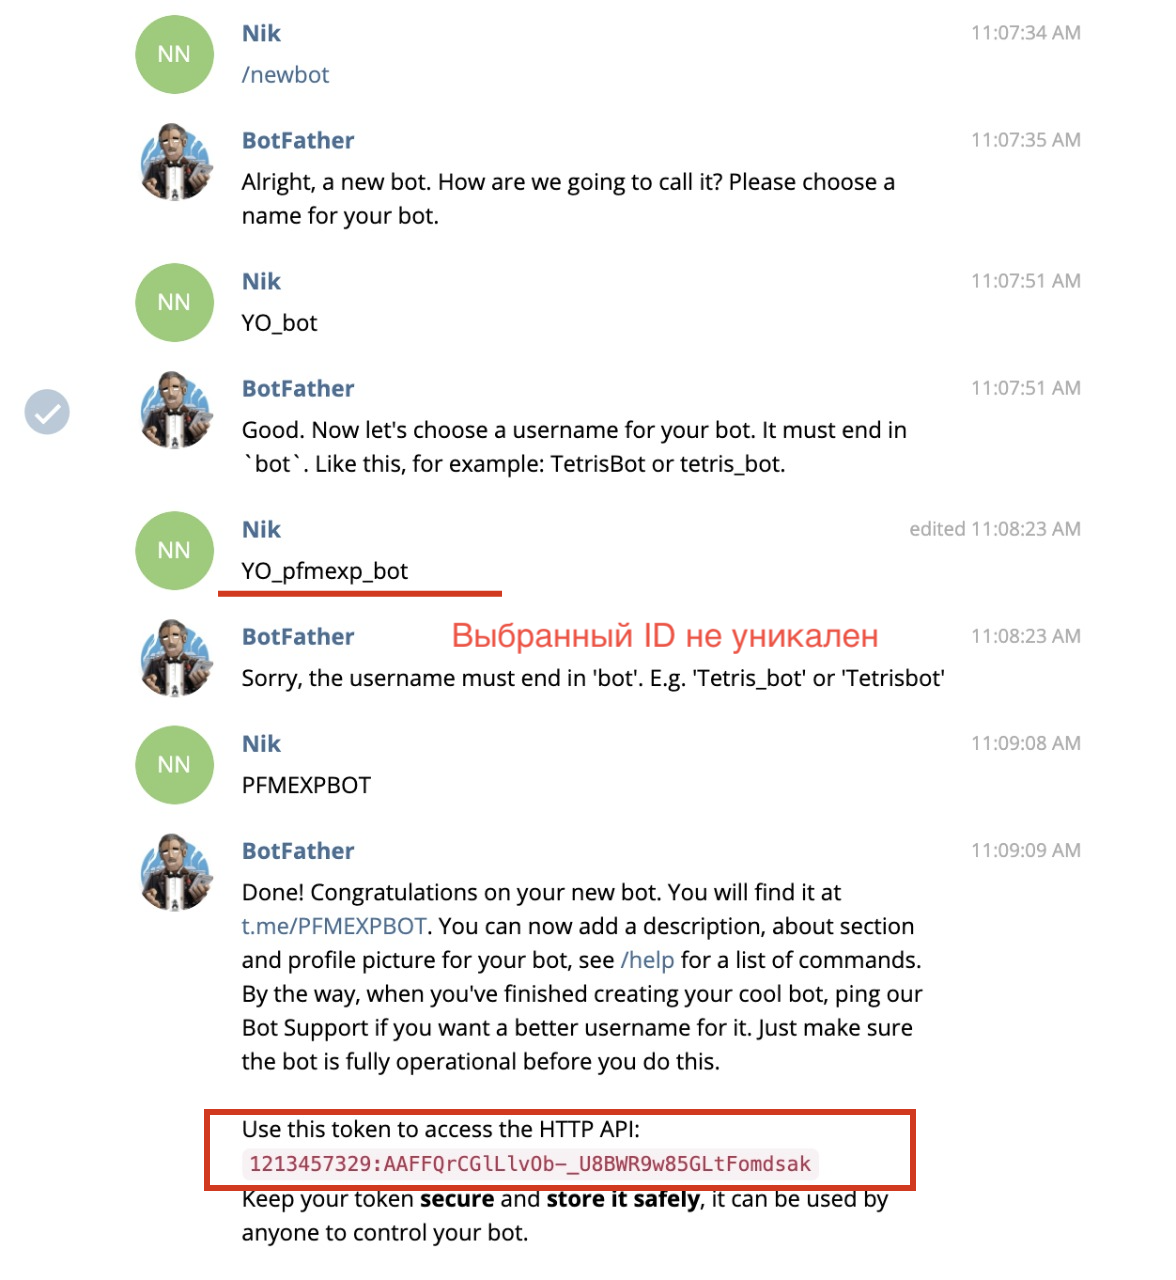

## Шаг 2. Пишем основу бота

Устанавливаем библиотеку python-telegram-bot. Ссылка на документацию https://github.com/python-telegram-bot/python-telegram-bot

In [ ]:
!pip install python-telegram-bot --upgrade

Явно зададим кодировку нашего кода

In [4]:
# -- coding: utf-8 -

telegram.ext подмодуль, предоставлющий простой в использовании интерфейс. Он состоит из нескольких классов, но двумя наиболее важными из них являются telegram.ext.Updater и telegram.ext.Dispatcher.
Класс Updater непрерывно получает новые обновления  из телеграмма и передает их в Dispatcher класс.
Если вы создадите Updater объект, он создаст Dispatcher для вас и свяжет их вместе.


Затем вы можете зарегистрировать обработчики разных типов в Dispatcher, который будет сортировать обновления, извлеченные в Updater соответствии с зарегистрированными вами обработчиками, и доставлять их в функцию обратного вызова, которую вы определили.


Напишем 2 обработчика команд. Это callback-функции, которые будут вызываться тогда, когда будет получено обновление. Напишем две таких функции для команды /start и для обычного любого текстового сообщения. В качестве аргументов туда передаются два параметра: bot и update. Bot содержит необходимые методы для взаимодействия с API, а update содержит данные о пришедшем сообщении.


Каждый обработчик является экземпляром любого подкласса класса telegram.ext.Handler . Библиотека предоставляет классы-обработчики почти для всех вариантов использования, но если вам нужно что-то очень конкретное, вы также можете создать подкласс Handler самостоятельно.

Теперь осталось лишь присвоить уведомлениям эти обработчики и начать поиск обновлений.
Цель состоит в том, чтобы вызывать эту функцию каждый раз, когда бот получает сообщение Telegram, содержащее /start команду. Для этого можно использовать CommandHandler(один из предоставленных подклассов Handler) и зарегистрировать его в диспетчере:
Класс Filters содержит ряд функций, которые фильтруют входящие сообщения на наличие текста, изображений, обновлений статуса и т.д. 
Любое сообщение, которое возвращает True в хотя бы одном из переданных фильтров, MessageHandler примет. Также можно написать свои собственные фильтры.


In [4]:
import logging

from telegram import Update
from telegram.ext import Updater, CommandHandler, MessageHandler, Filters, CallbackContext

In [5]:
# Define a few command handlers. These usually take the two arguments update and
# context. Error handlers also receive the raised TelegramError object in error.
def start(update: Update, context: CallbackContext):
    update.message.reply_text('Hi!')

def echo(update: Update, context: CallbackContext):
    txt = update.message.text
    
    update.message.reply_text('Ваше сообщение! ' + update.message.text)

In [ ]:
updater = Updater("1435831861:AAG3gLyDHH3rno8jyce60z1D3kZ4Ih8tU2o", use_context=True)
dispatcher = updater.dispatcher

# on different commands - answer in Telegram
dispatcher.add_handler(CommandHandler("start", start))
dispatcher.add_handler(MessageHandler(Filters.text & ~Filters.command, echo))

# Start the Bot
updater.start_polling()
updater.idle()

Создаём папку Bot, в которой потом создаём файл bot.py. 
Вы можете создать просто текстовый блокнот и вместо расширения .txt  напишите .py
Собираем код нашего бота.
Открываем консоль и переходим в директорию с файлом, и запускаем python3 bot.py
Бот будет работать пока будет открыто окно консоли. 